In [1]:
from google.colab import files
 
 
uploaded = files.upload()

Saving RTA Dataset.csv to RTA Dataset.csv


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['RTA Dataset.csv']))
print(df)


           Time Day_of_week Age_band_of_driver Sex_of_driver  \
0      17:02:00      Monday              18-30          Male   
1      17:02:00      Monday              31-50          Male   
2      17:02:00      Monday              18-30          Male   
3       1:06:00      Sunday              18-30          Male   
4       1:06:00      Sunday              18-30          Male   
...         ...         ...                ...           ...   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
0       Above high school                Employee              1-2yr   
1      Junior high school                Employee         Above 10yr   
2      Junior h

In [4]:
# print the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
# Find the number of missing values present in each column
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64


<Axes: >

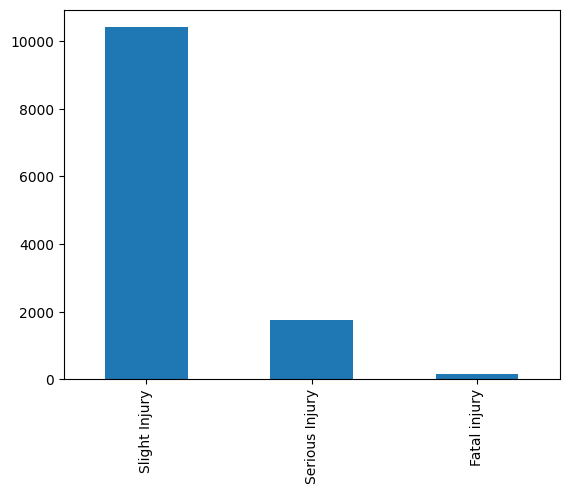

In [6]:
# target variable classes counts and bar plot
import matplotlib.pyplot as plt
print(df['Accident_severity'].value_counts())
df['Accident_severity'].value_counts().plot(kind='bar')

<Axes: >

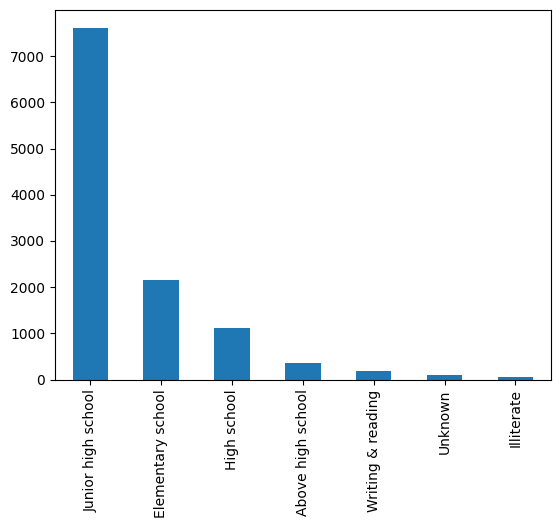

In [7]:
# Education levels of car drivers
df['Educational_level'].value_counts().plot(kind='bar')

Submission by: MrRookie


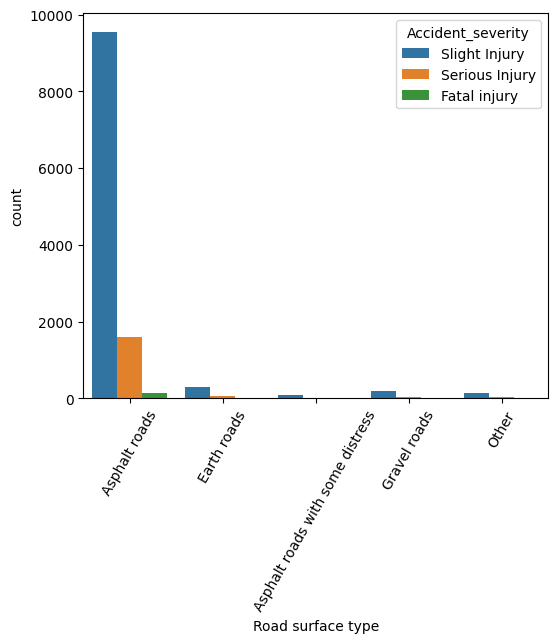

In [8]:
import seaborn as sns

stackup_username = "MrRookie"
print("Submission by:", stackup_username)

# plot the bar plot of road_surface_type and accident severity feature
plt.figure(figsize=(6,5))
sns.countplot(x="Road_surface_type", hue="Accident_severity", data=df)
plt.xlabel("Road surface type")
plt.xticks(rotation=60)
plt.show()

In [9]:
# convert object type column into datetime datatype column
df['Time'] = pd.to_datetime(df['Time'])

# Extrating 'Hour_of_Day' feature from the Time column
new_df = df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df.head()


,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,...,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1


In [10]:
# feature selection based on visualization (to_be_continue)
features = ['Day_of_week','Number_of_vehicles_involved','Number_of_casualties','Area_accident_occured',
      'Types_of_Junction','Age_band_of_driver','Sex_of_driver','Educational_level',
      'Vehicle_driver_relation','Type_of_vehicle','Driving_experience','Service_year_of_vehicle','Type_of_collision',
      'Sex_of_casualty','Age_band_of_casualty','Cause_of_accident','Hour_of_Day']
len(features)


17

In [11]:
# new dataframe generated
featureset_df = n_df[features]
target = n_df['Accident_severity']


In [12]:
# metadata of the new sub dataset
featureset_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12077 non-null  object
 4   Types_of_Junction            11429 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            11575 non-null  object
 8   Vehicle_driver_relation      11737 non-null  object
 9   Type_of_vehicle              11366 non-null  object
 10  Driving_experience           11487 non-null  object
 11  Service_year_of_vehicle      8388 non-null   object
 12  Type_of_collision            12161 non-null  object
 13  Sex_of_casualty              12

In [13]:
feature_df = featureset_df.copy()

# NaN are missing because service info might not be available, we will fill as 'Unknown'
feature_df['Service_year_of_vehicle'] = feature_df['Service_year_of_vehicle'].fillna('Unknown')
feature_df['Types_of_Junction'] = feature_df['Types_of_Junction'].fillna('Unknown')
feature_df['Area_accident_occured'] = feature_df['Area_accident_occured'].fillna('Unknown')
feature_df['Driving_experience'] = feature_df['Driving_experience'].fillna('unknown')
feature_df['Type_of_vehicle'] = feature_df['Type_of_vehicle'].fillna('Other')
feature_df['Vehicle_driver_relation'] = feature_df['Vehicle_driver_relation'].fillna('Unknown')
feature_df['Educational_level'] = feature_df['Educational_level'].fillna('Unknown')
feature_df['Type_of_collision'] = feature_df['Type_of_collision'].fillna('Unknown')

# features information
feature_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Number_of_vehicles_involved  12316 non-null  int64 
 2   Number_of_casualties         12316 non-null  int64 
 3   Area_accident_occured        12316 non-null  object
 4   Types_of_Junction            12316 non-null  object
 5   Age_band_of_driver           12316 non-null  object
 6   Sex_of_driver                12316 non-null  object
 7   Educational_level            12316 non-null  object
 8   Vehicle_driver_relation      12316 non-null  object
 9   Type_of_vehicle              12316 non-null  object
 10  Driving_experience           12316 non-null  object
 11  Service_year_of_vehicle      12316 non-null  object
 12  Type_of_collision            12316 non-null  object
 13  Sex_of_casualty              12

In [14]:
# setting input features X and target y 
X = feature_df[features] # here features are selected from 'object' datatype
y = n_df['Accident_severity']

# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape


(12316, 106)

In [15]:
# import labelencoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# create labelencoder object
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)


Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [16]:
# feature selection method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)

# Take the selected features
cols = fs.get_feature_names_out()

# convert selected features into dataframe
fs_df = pd.DataFrame(X_new, columns=cols)


In [17]:
import numpy as np

# importing the SMOTENC object from imblearn library 
from imblearn.over_sampling import SMOTENC

# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(3,50))

# creating smote object with SMOTENC class
smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_df,y_en)

# print the shape of new upsampled dataset
X_n.shape, y_n.shape


/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:572: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


((31245, 50), (31245,))

In [18]:
# print the target classes distribution
print(y_n.value_counts())


2    10415
1    10415
0    10415
dtype: int64


In [19]:
# import the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# train and test split and building baseline model to predict target features
X_trn, X_tst, y_trn, y_tst = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(X_trn, y_trn)

# predicting on test data
predics = rf.predict(X_tst)

# train score 
rf.score(X_trn, y_trn)


0.9439910385661706

In [21]:
stackup_username = "MrRookie"
print("Submission by:", stackup_username)

# classification report on test dataset
classif_re = classification_report(y_tst,predics)
print(classif_re)


Submission by: MrRookie
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2085
           1       0.84      0.84      0.84      2100
           2       0.86      0.86      0.86      2064

    accuracy                           0.88      6249
   macro avg       0.88      0.88      0.88      6249
weighted avg       0.88      0.88      0.88      6249



In [22]:
stackup_username = "MrRookie"
print("Submission by:", stackup_username)

# classification report on test dataset
classif_re = classification_report(y_tst,predics)
print(classif_re)


Submission by: MrRookie
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      2085
           1       0.84      0.84      0.84      2100
           2       0.86      0.86      0.86      2064

    accuracy                           0.88      6249
   macro avg       0.88      0.88      0.88      6249
weighted avg       0.88      0.88      0.88      6249



In [23]:
# f1_score of the model
f1score = f1_score(y_tst,predics, average='weighted')
print(f1score)


0.884425879481897


In [24]:
# selecting 7 categorical features from the dataframe
import joblib
from sklearn.preprocessing import OrdinalEncoder

new_fea_df = feature_df[['Type_of_collision','Age_band_of_driver','Sex_of_driver',
    'Educational_level','Service_year_of_vehicle','Day_of_week','Area_accident_occured']]

oencoder2 = OrdinalEncoder()
encoded_df3 = pd.DataFrame(oencoder2.fit_transform(new_fea_df))
encoded_df3.columns = new_fea_df.columns

# save the ordinal encoder object for inference pipeline
joblib.dump(oencoder2, "ordinal_encoder2.joblib")


['ordinal_encoder2.joblib']

In [25]:
# final dataframe to be trained for model inference
s_final_df = pd.concat([feature_df[['Number_of_vehicles_involved','Number_of_casualties','Hour_of_Day']],encoded_df3], axis=1)

# train and test split and building baseline model to predict target features
X_trn2, X_tst2, y_trn2, y_tst2 = train_test_split(s_final_df, y_en, test_size=0.2, random_state=42)

# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=700, max_depth=20, random_state=42)
rf.fit(X_trn2, y_trn2)

# save the model object
joblib.dump(rf, "rta_model_deploy3.joblib", compress=9)


['rta_model_deploy3.joblib']